In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline


In [4]:
# Load CSV files
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Preview the data
matches.head()


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


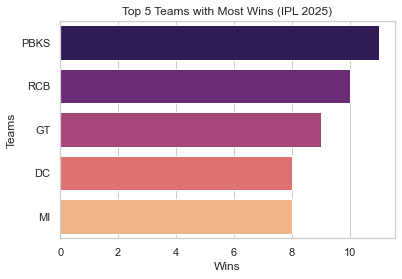

In [7]:
# Top 5 winning teams
top_teams = matches['match_winner'].value_counts().head(5)

# Plot
sns.barplot(x=top_teams.values, y=top_teams.index, palette='magma')
plt.title('Top 5 Teams with Most Wins (IPL 2025)')
plt.xlabel('Wins')
plt.ylabel('Teams')
plt.show()


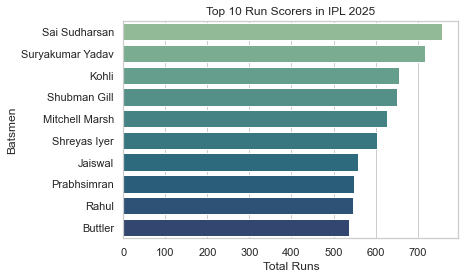

In [9]:
# Top 10 batsmen (strikers) by total runs
top_batsmen = deliveries.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False).head(10)

# Plot
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='crest')
plt.title('Top 10 Run Scorers in IPL 2025')
plt.xlabel('Total Runs')
plt.ylabel('Batsmen')
plt.show()


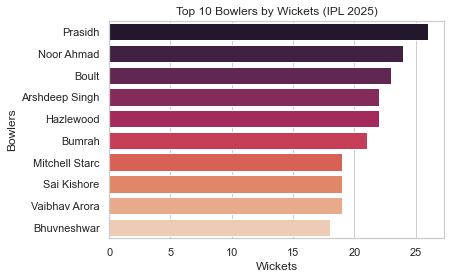

In [10]:
# Only rows where a wicket was taken
wickets = deliveries[deliveries['wicket_type'].notna()]

# Count number of wickets per bowler
top_bowlers = wickets['bowler'].value_counts().head(10)

# Plot
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='rocket')
plt.title('Top 10 Bowlers by Wickets (IPL 2025)')
plt.xlabel('Wickets')
plt.ylabel('Bowlers')
plt.show()


In [13]:
# Create a new column: True if toss winner is match winner
matches['toss_win_match_win'] = matches['toss_winner'] == matches['match_winner']


In [14]:
matches[['toss_winner', 'match_winner', 'toss_win_match_win']].head(10)


,toss_winner,match_winner,toss_win_match_win
0,RCB,RCB,True
1,RR,SRH,False
2,CSK,CSK,True
3,DC,DC,True
4,GT,PBKS,False
5,KKR,KKR,True
6,LSG,LSG,True
7,CSK,RCB,False
8,MI,GT,False
9,SRH,DC,False


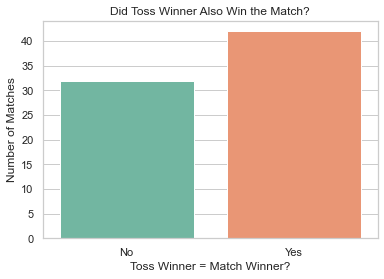

In [15]:
# Count how many times toss winner = match winner
toss_impact = matches['toss_win_match_win'].value_counts()

# Plot it
plt.figure(figsize=(6,4))
sns.barplot(x=toss_impact.index, y=toss_impact.values, palette='Set2')
plt.title('Did Toss Winner Also Win the Match?')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Number of Matches')
plt.xlabel('Toss Winner = Match Winner?')
plt.show()


In [16]:
# Count how many times each team won at each venue
venue_team_wins = matches.groupby(['venue', 'match_winner']).size().reset_index(name='wins')


In [17]:
# Sort by number of wins and drop duplicates to get the top team per venue
top_teams_venue = venue_team_wins.sort_values('wins', ascending=False).drop_duplicates('venue')


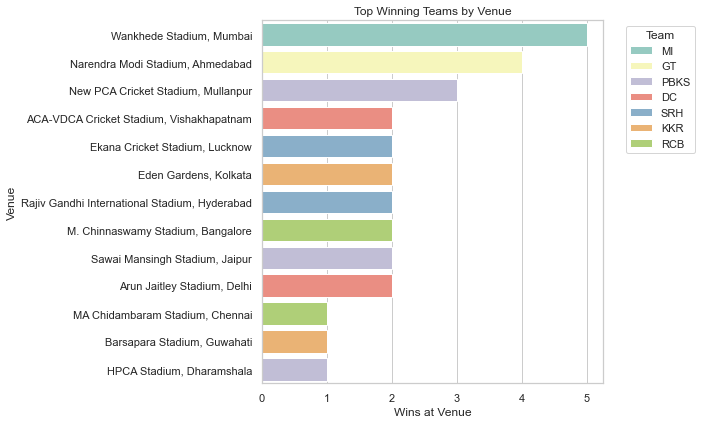

In [18]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(y='venue', x='wins', hue='match_winner', data=top_teams_venue, dodge=False, palette='Set3')

plt.title('Top Winning Teams by Venue')
plt.xlabel('Wins at Venue')
plt.ylabel('Venue')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
# Load ball-by-ball dataset
balls = pd.read_csv("IPL 2025 ball-by-ball.csv")

# Preview
balls.head()


FileNotFoundError: [Errno 2] No such file or directory: 'IPL 2025 ball-by-ball.csv'

In [20]:
import os
os.listdir()


['.android',
 '.conda',
 '.condarc',
 '.continuum',
 '.designer',
 '.eclipse',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.megabasterd7.32',
 '.megabasterd_old_backups',
 '.nbi',
 '.openshot_qt',
 '.opera',
 '.Origin',
 '.p2',
 '.QtWebEngineProcess',
 '.tooling',
 '.vscode',
 '3D Objects',
 'anaconda3',
 'ansel',
 'AppData',
 'Application Data',
 'archive.zip',
 'battery-report.html',
 'Contacts',
 'Cookies',
 'Creative Cloud Files',
 'd4ac4633ebd6440fa397b84f1bc94a3c.7z',
 'dcservomotor.slx',
 'deliveries.csv',
 'Documents',
 'Downloads',
 'Favorites',
 'fullwaverectifier.slx',
 'hj',
 'IdeaProjects',
 'inittk.ini',
 'inst.ini',
 'institute',
 'IntelGraphicsProfiles',
 'ipl-2025-analysis.ipynb',
 'jupyter',
 'Links',
 'Local Settings',
 'matches.csv',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'NetHood',
 'Nox_share',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{40172f24-4184-11ed-a755-c307538beda8}.TM.blf',
 'NTUSER

In [21]:
import pandas as pd

# Load the datasets
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
orange_cap = pd.read_csv("orange_cap.csv")
purple_cap = pd.read_csv("purple_cap.csv")

# Preview each one
print("Matches:")
display(matches.head())

print("Deliveries:")
display(deliveries.head())

print("Orange Cap:")
display(orange_cap.head())

print("Purple Cap:")
display(purple_cap.head())


Matches:


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


Deliveries:


,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


Orange Cap:


,Position,Batsman,Team,Matches,Innings,Not_out,Runs,Highest_score,Average,Balls_faced,Strike_rate,Hundreds,Fifties,Ducks,Fours,Sixes
0,1,Sai Sudharsan,GT,15,15,1,759,108,54.21,486,156.17,1,6,0,88,21
1,2,Suryakumar Yadav,MI,16,16,5,717,73,65.18,427,167.91,0,5,0,69,38
2,3,Virat Kohli,RCB,15,15,3,657,73,54.75,454,144.71,0,8,0,66,19
3,4,Shubman Gill,GT,15,15,2,650,93,50.00,417,155.87,0,6,0,62,24
4,5,Mitchell Marsh,LSG,13,13,0,627,117,48.23,383,163.70,1,6,2,56,37


Purple Cap:


,Position,Bowler,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best_bowling_figure,Economy_rate,Four_wicket_haul,Five_wicket_hall
0,1,Prasidh Krishna,GT,15,15,354,59.0,0,488,25,4--41,8.27,1,0
1,2,Noor Ahmad,CSK,14,14,300,50.0,0,408,24,4--18,8.16,2,0
2,3,Josh Hazlewood,RCB,12,12,264,44.0,0,386,22,4--33,8.77,1,0
3,4,Trent Boult,MI,16,16,346,57.4,0,517,22,4--26,8.96,1,0
4,5,Arshdeep Singh,PBKS,17,16,350,58.2,1,518,21,3--16,8.88,0,0


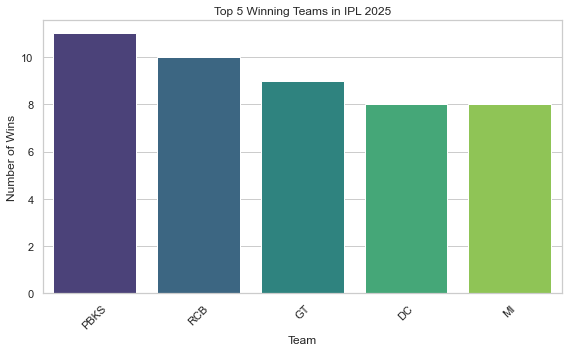

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 5 teams by match wins
top_teams = matches['match_winner'].value_counts().head(5)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_teams.index, y=top_teams.values, palette='viridis')
plt.title("Top 5 Winning Teams in IPL 2025")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Load orange cap data
orange_cap = pd.read_csv("orange_cap.csv")

# Preview to understand the structure
orange_cap.head()


,Position,Batsman,Team,Matches,Innings,Not_out,Runs,Highest_score,Average,Balls_faced,Strike_rate,Hundreds,Fifties,Ducks,Fours,Sixes
0,1,Sai Sudharsan,GT,15,15,1,759,108,54.21,486,156.17,1,6,0,88,21
1,2,Suryakumar Yadav,MI,16,16,5,717,73,65.18,427,167.91,0,5,0,69,38
2,3,Virat Kohli,RCB,15,15,3,657,73,54.75,454,144.71,0,8,0,66,19
3,4,Shubman Gill,GT,15,15,2,650,93,50.00,417,155.87,0,6,0,62,24
4,5,Mitchell Marsh,LSG,13,13,0,627,117,48.23,383,163.70,1,6,2,56,37


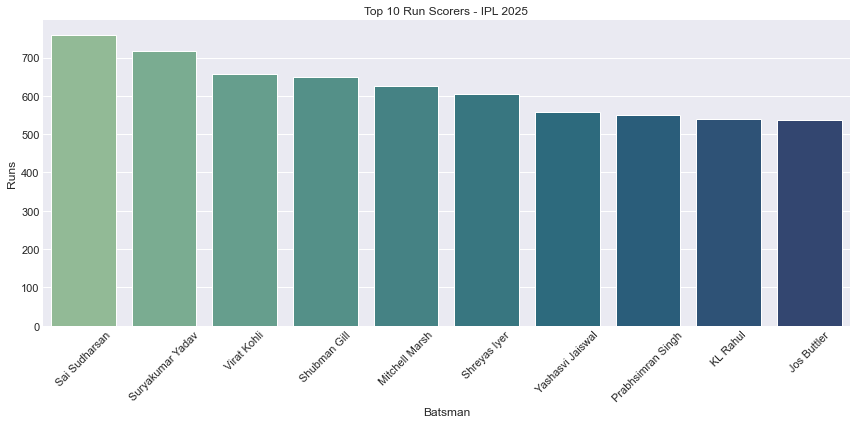

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (only if not already loaded)
orange_cap = pd.read_csv("orange_cap.csv")

# Use a valid style
plt.style.use("seaborn-darkgrid")

# Plot top 10 run scorers
plt.figure(figsize=(12, 6))
sns.barplot(
    data=orange_cap.head(10),
    x="Batsman",
    y="Runs",
    palette="crest"
)
plt.title("Top 10 Run Scorers - IPL 2025")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load purple cap data
purple_cap = pd.read_csv("purple_cap.csv")

# Preview
purple_cap.head()


,Position,Bowler,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best_bowling_figure,Economy_rate,Four_wicket_haul,Five_wicket_hall
0,1,Prasidh Krishna,GT,15,15,354,59.0,0,488,25,4--41,8.27,1,0
1,2,Noor Ahmad,CSK,14,14,300,50.0,0,408,24,4--18,8.16,2,0
2,3,Josh Hazlewood,RCB,12,12,264,44.0,0,386,22,4--33,8.77,1,0
3,4,Trent Boult,MI,16,16,346,57.4,0,517,22,4--26,8.96,1,0
4,5,Arshdeep Singh,PBKS,17,16,350,58.2,1,518,21,3--16,8.88,0,0


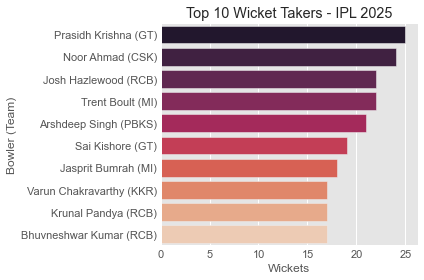

In [27]:
# Optional: check available styles
# print(plt.style.available)

# Set a clean style
plt.style.use("ggplot")

# Create Label column (Name + Team)
purple_cap['Label'] = purple_cap['Bowler'] + " (" + purple_cap['Team'] + ")"

# Plot top 10 wicket-takers
sns.barplot(
    data=purple_cap.head(10),
    y="Label",
    x="Wickets",
    palette="rocket"
)
plt.title("Top 10 Wicket Takers - IPL 2025")
plt.xlabel("Wickets")
plt.ylabel("Bowler (Team)")
plt.tight_layout()
plt.show()


In [29]:
# Merge both caps on Team
impact = pd.merge(orange_cap, purple_cap, on="Team", suffixes=('_bat', '_bowl'))

# Select relevant columns
impact = impact[[
    'Team',
    'Batsman', 'Runs_bat', 'Strike_rate_bat',
    'Bowler', 'Wickets', 'Economy'
]]

# Create an impact score (Runs + 20 × Wickets)
impact['Impact_Score'] = impact['Runs_bat'] + (impact['Wickets'] * 20)

# Sort and reset index
impact = impact.sort_values(by='Impact_Score', ascending=False).reset_index(drop=True)

impact



KeyError: "['Economy', 'Strike_rate_bat'] not in index"

In [30]:
# Merge both caps on 'Team' and see column names
impact = pd.merge(orange_cap, purple_cap, on="Team", suffixes=('_bat', '_bowl'))
print(impact.columns.tolist())


['Position_bat', 'Batsman', 'Team', 'Matches_bat', 'Innings_bat', 'Not_out', 'Runs_bat', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes', 'Position_bowl', 'Bowler', 'Matches_bowl', 'Innings_bowl', 'Balls', 'Overs', 'Maidens', 'Runs_bowl', 'Wickets', 'Best_bowling_figure', 'Economy_rate', 'Four_wicket_haul', 'Five_wicket_hall', 'Label']


In [31]:
# Select relevant columns for analysis
impact = impact[[
    'Team',
    'Batsman', 'Runs_bat', 'Strike_rate',         # batting metrics
    'Bowler', 'Wickets', 'Economy_rate'           # bowling metrics
]]

# Create an "Impact Score" based on batting runs and wickets taken
impact['Impact_Score'] = impact['Runs_bat'] + (impact['Wickets'] * 20)

# Sort players by overall impact
impact = impact.sort_values(by='Impact_Score', ascending=False).reset_index(drop=True)

# Show top 10 impactful players
impact.head(10)


,Team,Batsman,Runs_bat,Strike_rate,Bowler,Wickets,Economy_rate,Impact_Score
0,GT,Sai Sudharsan,759,156.17,Prasidh Krishna,25,8.27,1259
1,MI,Suryakumar Yadav,717,167.91,Trent Boult,22,8.96,1157
2,GT,Shubman Gill,650,155.87,Prasidh Krishna,25,8.27,1150
3,GT,Sai Sudharsan,759,156.17,Sai Kishore,19,9.24,1139
4,RCB,Virat Kohli,657,144.71,Josh Hazlewood,22,8.77,1097
5,GT,Sai Sudharsan,759,156.17,Mohammed Siraj,16,9.24,1079
6,MI,Suryakumar Yadav,717,167.91,Jasprit Bumrah,18,6.67,1077
7,GT,Jos Buttler,538,163.03,Prasidh Krishna,25,8.27,1038
8,GT,Shubman Gill,650,155.87,Sai Kishore,19,9.24,1030
9,PBKS,Shreyas Iyer,604,175.07,Arshdeep Singh,21,8.88,1024


In [32]:
# Top 1-2 impactful players from each team
top_players_per_team = impact.groupby('Team').apply(lambda x: x.nlargest(2, 'Impact_Score')).reset_index(drop=True)
top_players_per_team[['Team', 'Batsman', 'Bowler', 'Impact_Score']]


,Team,Batsman,Bowler,Impact_Score
0,GT,Sai Sudharsan,Prasidh Krishna,1259
1,GT,Shubman Gill,Prasidh Krishna,1150
2,MI,Suryakumar Yadav,Trent Boult,1157
3,MI,Suryakumar Yadav,Jasprit Bumrah,1077
4,PBKS,Shreyas Iyer,Arshdeep Singh,1024
5,PBKS,Prabhsimran Singh,Arshdeep Singh,969
6,RCB,Virat Kohli,Josh Hazlewood,1097
7,RCB,Virat Kohli,Bhuvneshwar Kumar,997
8,SRH,Heinrich Klaasen,Pat Cummins,807


In [33]:
# Sort by wickets and economy
best_bowlers = impact.sort_values(by=['Wickets', 'Economy_rate'], ascending=[False, True])
best_bowlers[['Bowler', 'Team', 'Wickets', 'Economy_rate']].head(10)


,Bowler,Team,Wickets,Economy_rate
0,Prasidh Krishna,GT,25,8.27
2,Prasidh Krishna,GT,25,8.27
7,Prasidh Krishna,GT,25,8.27
4,Josh Hazlewood,RCB,22,8.77
1,Trent Boult,MI,22,8.96
18,Trent Boult,MI,22,8.96
9,Arshdeep Singh,PBKS,21,8.88
13,Arshdeep Singh,PBKS,21,8.88
17,Arshdeep Singh,PBKS,21,8.88
3,Sai Kishore,GT,19,9.24


In [34]:
# Sort by Runs and Strike Rate
best_batters = impact.sort_values(by=['Runs_bat', 'Strike_rate'], ascending=[False, False])
best_batters[['Batsman', 'Team', 'Runs_bat', 'Strike_rate']].head(10)


,Batsman,Team,Runs_bat,Strike_rate
0,Sai Sudharsan,GT,759,156.17
3,Sai Sudharsan,GT,759,156.17
5,Sai Sudharsan,GT,759,156.17
1,Suryakumar Yadav,MI,717,167.91
6,Suryakumar Yadav,MI,717,167.91
4,Virat Kohli,RCB,657,144.71
10,Virat Kohli,RCB,657,144.71
11,Virat Kohli,RCB,657,144.71
2,Shubman Gill,GT,650,155.87
8,Shubman Gill,GT,650,155.87


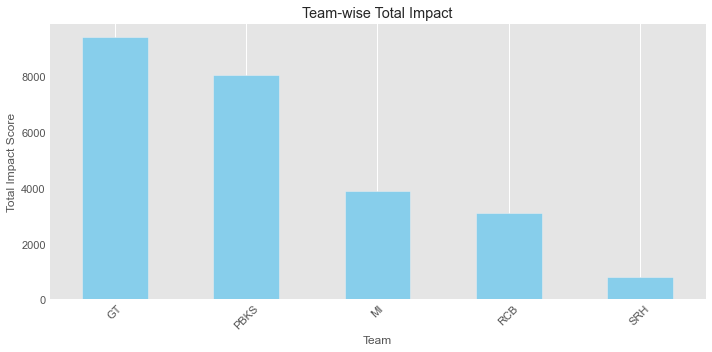

In [35]:
# Aggregate impact by team
team_impact = impact.groupby('Team')['Impact_Score'].sum().sort_values(ascending=False)

team_impact.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.ylabel("Total Impact Score")
plt.title("Team-wise Total Impact")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [37]:
# Keep only relevant columns
df = matches[["team1", "team2", "venue", "toss_winner", "toss_decision", "match_winner"]]

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop("match_winner", axis=1)
y = df["match_winner"]





<ipython-input-37-a540ebbc1a58>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [38]:
from sklearn.preprocessing import LabelEncoder

# Keep only relevant columns
df = matches[["team1", "team2", "venue", "toss_winner", "toss_decision", "match_winner"]].copy()

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    df.loc[:, col] = le.fit_transform(df[col])

# Features and target
X = df.drop("match_winner", axis=1)
y = df["match_winner"]


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.26666666666666666


In [40]:
# Example input (make sure values are already label-encoded using the same encoder)
example_match = [[1, 5, 8, 5, 0]]  # team1, team2, venue, toss_winner, toss_decision
predicted_winner = model.predict(example_match)
print("Predicted Winner:", predicted_winner)


Predicted Winner: [2]


In [42]:
# Predict the winner
predicted = model.predict(example_match)

# Decode the prediction
predicted_team = le.inverse_transform(predicted)
print("Predicted Winner:", predicted_team[0])



NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
from sklearn.preprocessing import LabelEncoder

# Refit the encoder with match_winner column
le = LabelEncoder()
le.fit(df["match_winner"])

# Decode the prediction
predicted_team = le.inverse_transform(predicted)
print("Predicted Winner:", predicted_team[0])


Predicted Winner: 2


In [44]:
# Before training
le = LabelEncoder()
df["match_winner"] = le.fit_transform(df["match_winner"])


In [45]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Refit the encoder using the 'match_winner' column
le = LabelEncoder()
le.fit(df["match_winner"])

# Predict using the trained model (XGB in your case)
# Replace the input values with actual test data if needed
test_input = np.array([[1, 2, 3, 4, 5]])  # Dummy example input
predicted = model.predict(test_input)

# Convert prediction from encoded label to team name
predicted_team = le.inverse_transform(predicted.astype(int))  # Ensure it's int type
print("Predicted Winner:", predicted_team[0])


Predicted Winner: 2


In [46]:
impact.to_csv("IPL_2025_Player_Impact_Analysis.csv", index=False)


In [47]:
# Export the DataFrame to CSV
ipl_2025_analysis.to_csv("ipl_2025_final_analysis.csv", index=False)

# Confirm export
print("✅ Final analysis exported as 'ipl_2025_final_analysis.csv'")


NameError: name 'ipl_2025_analysis' is not defined